Wine Qualityを分類する学習モデルの構築です

データセットはUCIのWine Qualityよりダウンロードしたもので，品質は0から10までで評価されたもの，入力に使用できるデータはワインの成分分析により得た11種類の特徴量です

In [2]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')
# ライブラリインポート
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


学習回数はepochs，使用する特徴量はfeaturesで選択可能 (True or False)

scale_enableで特徴量の正規化を行うかどうかを指定できる（True or False）

結果にROCカーブとPRカーブも表示します

Data Loading
Data size of feature (1599, 11)
Data size of class (1599,)
Scaled results
Scaled Data train1: Min 0.000, Max 1.000
Scaled Data test1: Min -0.009, Max 0.973
Scaled Data train2: Min 0.000, Max 1.000
Scaled Data test2: Min 0.041, Max 0.610
Scaled Data train3: Min 0.000, Max 1.000
Scaled Data test3: Min 0.000, Max 0.790
Scaled Data train4: Min 0.000, Max 1.000
Scaled Data test4: Min 0.021, Max 0.671
Scaled Data train5: Min 0.000, Max 1.000
Scaled Data test5: Min 0.045, Max 0.671
Scaled Data train6: Min 0.000, Max 1.000
Scaled Data test6: Min 0.000, Max 0.944
Scaled Data train7: Min 0.000, Max 1.000
Scaled Data test7: Min 0.000, Max 0.562
Scaled Data train8: Min 0.000, Max 1.000
Scaled Data test8: Min 0.054, Max 0.960
Scaled Data train9: Min 0.000, Max 1.000
Scaled Data test9: Min 0.118, Max 1.000
Scaled Data train10: Min 0.000, Max 1.000
Scaled Data test10: Min 0.024, Max 0.617
Scaled Data train11: Min 0.000, Max 1.000
Scaled Data test11: Min 0.046, Max 0.862
Data size of sele

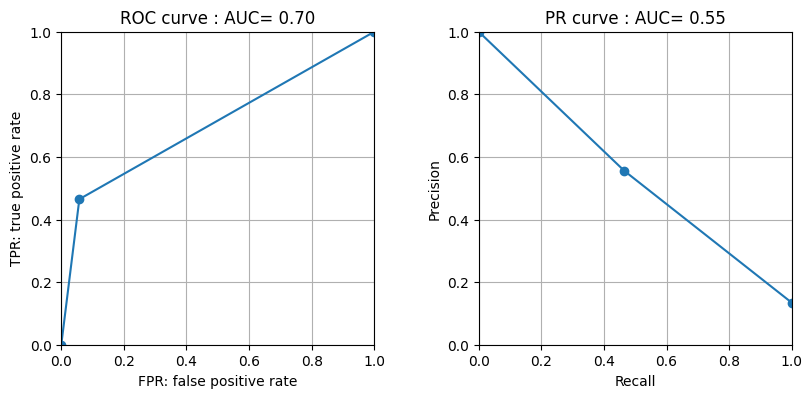

In [4]:
#　Wine Quality Classification
#  (11 features, 11 classes)
# Quality between 0 to 10

# 学習回数
epochs = 1000
# 特徴量の選択（列選択:左から順番に0列から10列，Trueで選択有効）
#features = [False,False,False,False,False,False,False,False,False,False,True] # 例：アルコール度数だけ選択
features = [True,True,True,True,True,True,True,True,True,True,True]
# 正規化
scale_enable = True


# Load data
print("Data Loading")
# 読み込みフォルダパス
directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/winequality_data/'
file_name = 'winequality-red.csv'
wine = np.loadtxt(directory_name + file_name, delimiter=';', skiprows=1, dtype='float32')
X = wine[:, :11]  # features of wine based on physicochemical tests
y = wine[:, 11]   # quality

# Change to binary classification
# 0: Quality 0 to 6
# 1: Quality 7 to 10
y_binary = np.where(y < 7, 0, 1)
#print('Min {}, Max {}'.format(np.min(y_binary), np.max(y_binary)))

print("Data size of feature {}".format(X.shape))
print("Data size of class {}".format(y_binary.shape))

# data split (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2, stratify = y_binary)

# Scaling data of X (0 - 1)
scaled_X_train = np.empty(X_train.shape, dtype=np.float32)
scaled_X_test = np.empty(X_test.shape, dtype=np.float32)
if scale_enable == True:
	scaler11 = [MinMaxScaler() for i in range(11)]
	print("Scaled results")
	for i in range(11):
		scaler11[i].fit(X_train[:,i].reshape(-1,1))
		scaled_X_train[:,i] = scaler11[i].transform(X_train[:,i].reshape(-1,1)).squeeze()
		print("Scaled Data train{}: Min {:.3f}, Max {:.3f}".format(i+1, np.min(scaled_X_train[:,i]), np.max(scaled_X_train[:,i])))
		scaled_X_test[:,i] = scaler11[i].transform(X_test[:,i].reshape(-1,1)).squeeze()
		print("Scaled Data test{}: Min {:.3f}, Max {:.3f}".format(i+1, np.min(scaled_X_test[:,i]), np.max(scaled_X_test[:,i])))
else:
	print("No scaling")
	scaled_X_train = X_train
	scaled_X_test = X_test


# Select Features
enable_X_train = scaled_X_train[:, features]
enable_X_test = scaled_X_test[:, features]
print("Data size of selected features (train) {}".format(enable_X_train.shape))
print("Data size of selected features (test) {}".format(enable_X_test.shape))

# 分類器：多層ニューラルネットワーク
# hidden_layer_sizes : 中間層数、各中間層ニューロン数
# max_iter : 学習回数上限
# tol : 損失関数の値の変化が10回tol値以下で学習終了
# random_state : 重みの初期値 (1＝ランダム初期値固定、None = ランダム初期値変化）
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=epochs, tol=0.000001, random_state=1, verbose=1)

# ニューラルネットワークの学習
print('Now Learning')
clf.fit(enable_X_train, y_train)


# 分類精度を計算
# 学習データに対する分類結果を取得
result = clf.predict(enable_X_train)
# データ数をtotalに格納
# len : 配列の長さ取得（２次元配列に対しては行数取得）
total = len(enable_X_train)
# ターゲット（正解）と予測が一致した数をcorrect_numに格納
correct_num = sum(result==y_train)

print('')
print('class 0 (not excellent): {}, class 1 (excellent): {}\n'.format(np.count_nonzero(y_binary==0), np.count_nonzero(y_binary==1)))
print('Data num of train: {}'.format(total))
print('Accuracy (0-1): {:.4f}'.format(correct_num/total))
print('Precision (0-1): {:.4f}'.format(precision_score(y_train, result)))
print('Recall (0-1): {:.4f}\n'.format(recall_score(y_train, result)))
#print('{}'.format(sum(y_train)))

# for test data
result_test = clf.predict(enable_X_test)
total_test = len(enable_X_test)
correct_num = sum(result_test==y_test)
print('Data num of test: {}'.format(total_test))
print('Accuracy (0-1): {:.4f}'.format(correct_num/total_test))
print('Precision (0-1): {:.4f}'.format(precision_score(y_test, result_test)))
print('Recall (0-1): {:.4f}\n'.format(recall_score(y_test, result_test)))

# ROC curve
#result_probability = clf.predict_proba(scaled_X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, result_test)
auc_roc = auc(fpr, tpr) # AUC計算（ROCカーブ）
precision, recall, thresholds = precision_recall_curve(y_test, result_test)
auc_pr = auc(recall, precision) # AUC計算（PRカーブ）
#fig = plt.figure(figsize = (5, 5))
#axs = fig.add_subplot(1,1,1)
#axs.plot(fpr, tpr, marker='o')
#axs.set_title('ROC curve: AUC= {:.2f}'.format(auc_roc))
#axs.set_xlabel('FPR: false positive rate')
#axs.set_ylabel('TPR: true positive rate')
#axs.set_xlim(0, 1.0)
#axs.set_ylim(0, 1.0)
#axs.grid()
#plt.show()


# グラフウインドウ全体の大きさ(縦方向に1枚、横方向に2枚のグラフ表示領域を確保)
fig, axs = plt.subplots(1, 2, figsize=(8.5,4.0), squeeze=False)
# Graph 1
# Graph title
axs[0,0].set_title('ROC curve : AUC= {:.2f}'.format(auc_roc))
# 背景の色をクラス領域毎に塗りつぶし
axs[0,0].plot(fpr, tpr, marker='o')
# 軸ラベルを設定
axs[0,0].set_xlabel('FPR: false positive rate')
axs[0,0].set_ylabel('TPR: true positive rate')
# limit
axs[0,0].set_xlim(0, 1.0)
axs[0,0].set_ylim(0, 1.0)
axs[0,0].grid()
# aspect
axs[0,0].set_aspect('equal','box')
# Graph 2
# Graph title
axs[0,1].set_title('PR curve : AUC= {:.2f}'.format(auc_pr))
# 背景の色をクラス領域毎に塗りつぶし
axs[0,1].plot(recall, precision, marker='o')
# 軸ラベルを設定
axs[0,1].set_xlabel('Recall')
axs[0,1].set_ylabel('Precision')
# limit
axs[0,1].set_xlim(0, 1.0)
axs[0,1].set_ylim(0, 1.0)
axs[0,1].grid()
# aspect
axs[0,1].set_aspect('equal','box')

# グラフを表示
plt.tight_layout()
plt.show()
